In [1]:
import sys
from os.path import join as pjoin
import textworld
from textworld.challenges import lab_game
from textworld.generator.lab_game import LabGameOptions
from textworld.generator.process_graph import ProcessGraph
from textworld.utils import quest_gen_logger



In [3]:
game_name = 'lab-game'
try:
    # Set lab game creation parameters
    mode = "hard"
    seed = 1554442
    lab_game_options = LabGameOptions()
    lab_game_options.max_quest_length = 22
    lab_game_options.sketch_gen_options.max_steps = 1500
    lab_game_options.seeds = seed
    
    # Set surface generation automatically according to game difficulty
    lab_game_options.surface_gen_options.set_difficulty_mode(mode)
    
    # make the game
    game = lab_game.make_game(mode, lab_game_options)
    quest = game.quests[0]
    quest_gen_logger.info("Quest surface is: %s" % (quest.desc))

    # compile it
    lab_game_options.path = pjoin("gen_games", game.metadata["uuid"] + ".ulx")
    lab_game_options.force_compile = True
    game_file = textworld.generator.compile_game(game, lab_game_options)
    print("*** Game created: {}".format(game_file))
    
except Exception as e:
    print("Failed to generate game from seed %d, error: %s" % (seed, str(e)))
    

2018-12-12 17:52:42,266 | INFO : Searching for quest satisfying constraints...
2018-12-12 17:52:44,073 | INFO : Found solution!
2018-12-12 17:52:44,074 | INFO : Found quest: [take(m_3), take(m_1), take(m_0), grind(m_0,md_0), mix(m_0,lc_0), melt(m_1,fd_0), mix(m_1,lc_0), compact(m_3,pd_0), grind(m_3,md_0), mix(m_3,lc_0), take(m_2), grind(m_2,md_0), mix(m_2,lc_0)]
2018-12-12 17:52:44,083 | INFO : Quest surface is: The starting materials are Ge, Mn, Ni and Fe. To start, grind Fe. After that, compact and grind Ni. Following that, melt Mn. Next, grind Ge. To finish, mix the materials.
*** Game created: gen_games/tw-lab_game-rZI7-lab-eBW-leebHjMac6vkhjjR.ulx


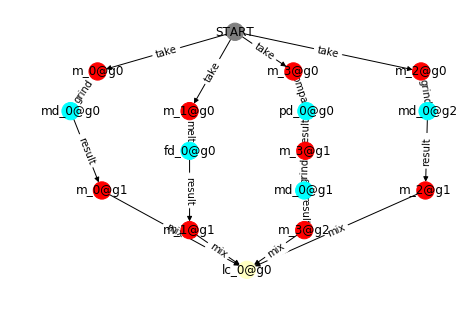

In [5]:
# Draw material synthesis quest (game solution)
pg = ProcessGraph()
pg.from_tw_quest(quest)
pg.draw()

In [ ]:
env = textworld.play(lab_game_options.path)




                    ________  ________  __    __  ________
                   |        \|        \|  \  |  \|        \
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$
                      | $$   | $$__     \$$\/  $$   | $$
                      | $$   | $$  \     >$$  $$    | $$
                      | $$   | $$$$$    /  $$$$\    | $$
                      | $$   | $$_____ |  $$ \$$\   | $$
                      | $$   | $$     \| $$  | $$   | $$
                       \$$    \$$$$$$$$ \$$   \$$    \$$
              __       __   ______   _______   __        _______
             |  \  _  |  \ /      \ |       \ |  \      |       \
             | $$ / \ | $$|  $$$$$$\| $$$$$$$\| $$      | $$$$$$$\
             | $$/  $\| $$| $$  | $$| $$__| $$| $$      | $$  | $$
             | $$  $$$\ $$| $$  | $$| $$    $$| $$      | $$  | $$
             | $$ $$\$$\$$| $$  | $$| $$$$$$$\| $$      | $$  | $$
             | $$$$  \$$$$| $$__/ $$| $$  | $$| $$_____ | $$__/ $$
          